# Cardiovascular disease classification

![separator](img/sep.jpeg)

We introduce a basic Machine Learning Modelling Framework, by tackeling the task of classifiying breast cancer tumours. 
We proceed as follow:

* **Data analysis** - We prepare, study and explore a dataset, highliting important correlations.
* **Model modelling** - we create and train a model to predict a target variable, then we tune the hyper-parameters of our model in order to improve it if possible.
* **Model evaluation and comparison** - we evaluate it using some metrics and compare them to find the best one.  
* **Feature importance** - we highlight the important parameters in predictiong the presence of a cardiovascular disease.
* **Conclusion**.

To work through these topics, we'll use `pandas`, `Matplotlib` and `NumPy` for data anaylsis, as well as, `Scikit-Learn` for machine learning and modelling tasks:

In [218]:
# Data analysis libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Scikit Learn Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Scikit Learn Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Scikit Learn preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA

For visibility reasons, I will use the following set of colours : 
<span style='color:#502382'>#502382</span>, <span style='color:#cbc9e2'>#cbc9e2</span>, <span style='color:#fed299'>#fed299</span> and <span style='color:#ae5506'>#ae5506</span>

In [232]:
#sns.heatmap(np.linspace(1,5,15).reshape(5,3), cmap='PuOr_r');

Colours = ['#491c76', '#aba3cd', '#f7f7f6', '#f9b158', '#a44f07']

## 1) Data analysis:

The original data were collected during medical examinations, and belong to the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository. We use a more compact one with relevant parameters from : [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

### Data description: 

The rows in the dataset represent patients and the columns represent examination results from various blood and medical tests. We use the dataset to make a prediction on our target variable:

| Features                                           | Variable Type       | Variable   | Value Type                                                                                                            |
|:---------------------------------------------------|:--------------------|:-----------|:----------------------------------------------------------------------------------------------------------------------|
| Age                                                | Objective Feature   | age        | int(years)                                                                                                            |
| Gender                                             | Objective Feature   | sex        | categorical code: 1 = male; 0 = female                                                                                |
| Chest pain type                                    | Examination Feature | cp         | categorical code : 0: Typical angina; 1: Atypical angina; 2: Non-anginal pain; 3: Asymptomatic                        |
| Resting blood pressure                             | Examination Feature | trestbps   | float (mm Hg)                                                                                                         |
| Serum cholestoral                                  | Examination Feature | chol       | float (mg/dl)                                                                                                         |
| Fasting blood sugar > 120 mg/dl                    | Examination Feature | fbs        | binary                                                                                                                |
| Resting electrocardiographic results               | Examination Feature | restecg    | categorical code : 0: Nothing to note; 1: ST-T Wave abnormality; 2: Possible or definite left ventricular hypertrophy |
| Maximum heart rate achieved                        | Examination Feature | thalach    | float                                                                                                                 |
| Exercise induced angina                            | Examination Feature | exang      | binary                                                                                                                |
| ST depression induced by exercise relative to rest | Examination Feature | oldpeak    | float                                                                                                                 |
| The slope of the peak exercise ST segment          | Examination Feature | slope      | categorical code : 0: Upsloping; 1: Flatsloping; 2: Downslopins                                                       |
| Number of major vessels colored by flourosopy      | Examination Feature | ca         | int (0-3)                                                                                                             |
| Thalium stress result                              | Examination Feature | thal       | int: 1,3: normal; 6: fixed defect; 7: reversable defect                                                               |
| Presence or absence of cardiovascular disease      | Target Variable     | target     | binary: 1=yes, 0=no                                                                                                               |


We store this description in a dictionnary for further use:

In [233]:
data_desc = pd.DataFrame({
    'Features' : ['Age', 'Gender', 'Chest pain type', 'Resting blood pressure', 'Serum cholestoral', 'Fasting blood sugar > 120 mg/dl', 'Resting electrocardiographic results', 'Maximum heart rate achieved',
                  'Exercise induced angina', 'ST depression induced by exercise relative to rest', 'The slope of the peak exercise ST segment', 'Number of major vessels colored by flourosopy', 
                  'Thalium stress result', 'Presence or absence of cardiovascular disease'],
    'Variable Type' : ['Objective Feature', 'Objective Feature', 'Examination Feature', 
                                  'Examination Feature', 'Examination Feature', 'Examination Feature', 
                                  'Examination Feature', 'Examination Feature', 'Examination Feature', 
                                  'Examination Feature', 'Examination Feature', 'Examination Feature',
                                  'Examination Feature', 'Target Variable'],
    'Variable' : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                             'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
    'Value Type' : ['int(years)', 'categorical code: 1 = male; 0 = female', 
                    'categorical code : 0: Typical angina; 1: Atypical angina; 2: Non-anginal pain; 3: Asymptomatic', 
                    'float (mm Hg)', 'float (mg/dl)', 'binary', 'categorical code : 0: Nothing to note; 1: ST-T Wave abnormality; 2: Possible or definite left ventricular hypertrophy', 'float', 'binary',
                    'float', 'categorical code : 0: Upsloping; 1: Flatsloping; 2: Downslopins', 'int (0-3)', 'int: 1,3: normal; 6: fixed defect; 7: reversable defect', 'binary']
})

### Data exploration:

We start by reading our CSV file usin `pandas`

In [234]:
heart_df = pd.read_csv('files/heart.csv')
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


and have a look at how many positive and negative samples there are:

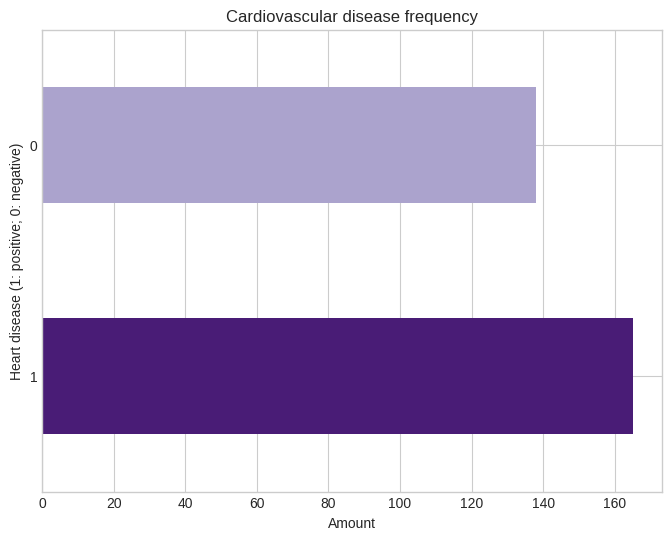

In [235]:
fig, ax = plt.subplots(figsize = (8,6))
heart_df.target.value_counts().plot(kind = 'barh',
                                    color=(Colours[0], Colours[1]),
                                    ax = ax)

plt.style.use('seaborn-whitegrid')
plt.title('Cardiovascular disease frequency')
plt.xlabel('Amount')
plt.ylabel('Heart disease (1: positive; 0: negative)');

Since the values are close to each other, this suggests that the`target` column can be considered **balanced**. 

We first explore some possible correlation between independent variables, as this may suggest which independent variables may or may not have an impact on our target variable:

### Correlation matrix: 

A correlation matrix tells us how related each variable is to the other. We do this using `heart_df.corr()` :

In [236]:
corr_mtrx = heart_df.corr()

Since correlation matrices are symmetrical, half of it suffices to analyze correctly the data, hence we triangulate it as follow:

In [237]:
#Mask the upper triangle: 
mask = np.triu(np.ones(corr_mtrx.shape),0)

and we plot a heatmap using `seaborn` that would graphically highlits our correlations:

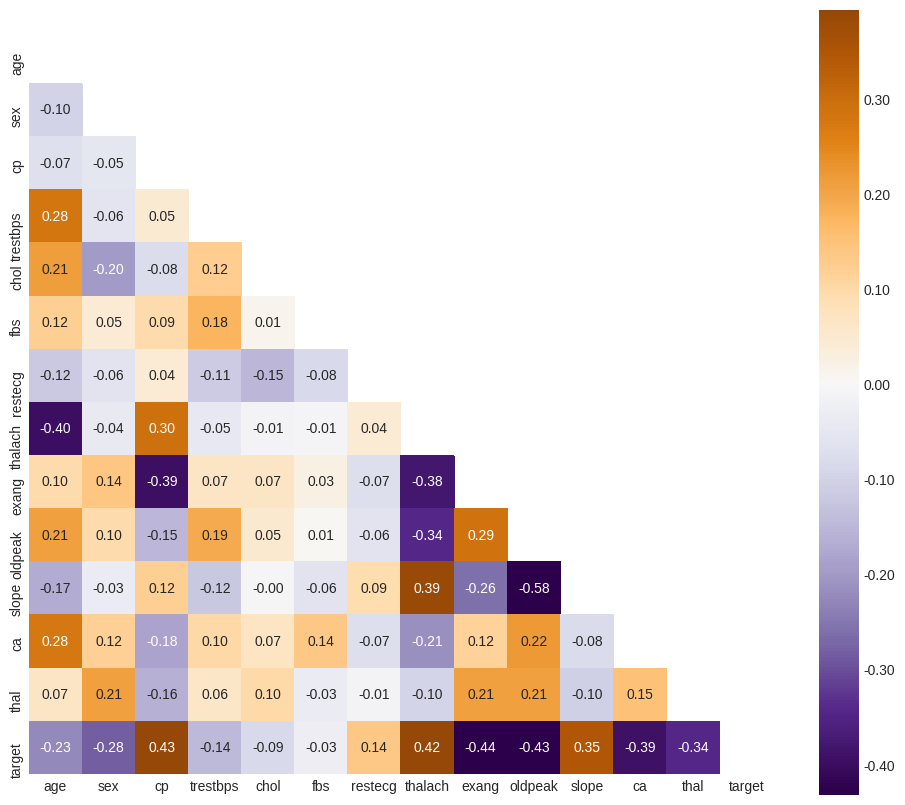

In [238]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(
    data=corr_mtrx,
    cmap='PuOr_r',
    center = 0,
    robust=True,
    annot = True,
    fmt = '.2f',
    square = True,
    cbar_kws={
            'shrink': .85,
            'format': '%.2f'
        },
    mask=mask)


A higher positive (resp. negative) value means a potential positive (resp. negative) correlation. 

For example, we observe a negative correlation between cardiovascular diseases and gender: Indeed, if we look closer, this is partially due to the fact that there are almost more males patiens than females in the sample:

In [239]:
heart_df['sex'].value_counts(normalize=True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

where 68% are  `1: male` and 32% `0: female`

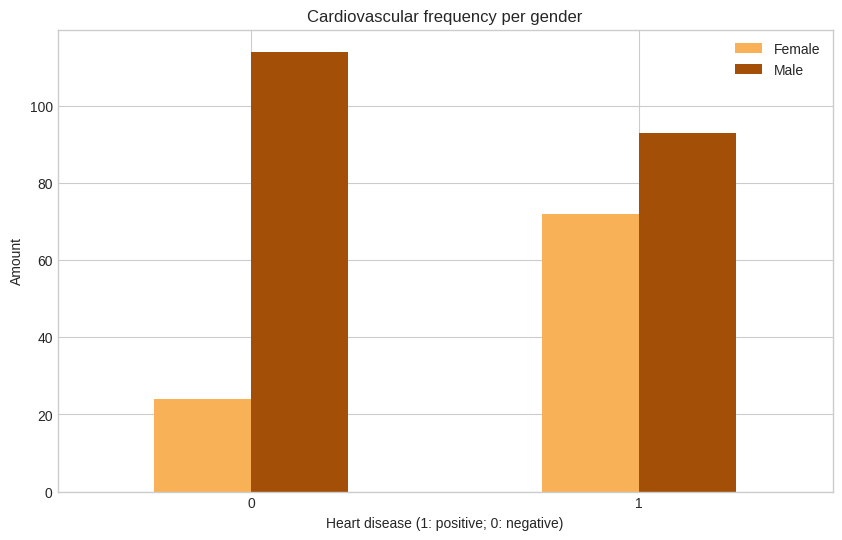

In [242]:
fig, ax = plt.subplots(figsize = (8,8))

pd.crosstab(heart_df['target'], heart_df['sex']).plot(kind='bar',
                                                      xlabel='Heart disease (1: positive; 0: negative)',
                                                      figsize=(10,6), 
                                                      color=(Colours[3], Colours[4]),
                                                      ax = ax)

plt.title('Cardiovascular frequency per gender')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
# keep the labels on the x-axis vertical
plt.xticks(rotation=0); 

We observe a negative corrolation of `target` with age, while having a positive correlation with `thalac`. We try then to understand how age and maximal heart rate relate in accordence to the presence or not of cardiovascular diseases:

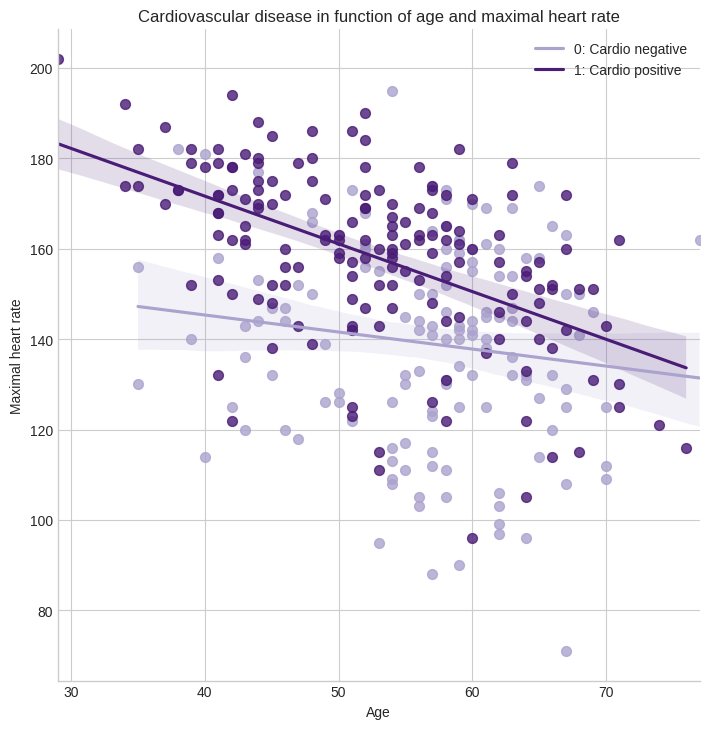

In [243]:
# Cardio positive:
sns.lmplot(x='age',
           y='thalach', 
           hue='target', 
           palette = (Colours[1], Colours[0]), 
           data=heart_df, 
           height=7, 
           scatter_kws={'s': 50},
           legend = False)

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Cardiovascular disease in function of age and maximal heart rate')
plt.xlabel('Age')
plt.legend(['0: Cardio negative', '1: Cardio positive'])
plt.ylabel('Maximal heart rate');

First, we observe that the maximal heart rate regresses with age: this makes sense, the younger someone is, the higher its maximal heart rate is. What is also interesting is that the regression is more important in patients <span style='color:#502382'>**with cardiovascular problems**</span>, as the slope of regression is clearly of `target 1` is clearly higher than of `target 0`.

However, this might also be misleading due to the following fact:

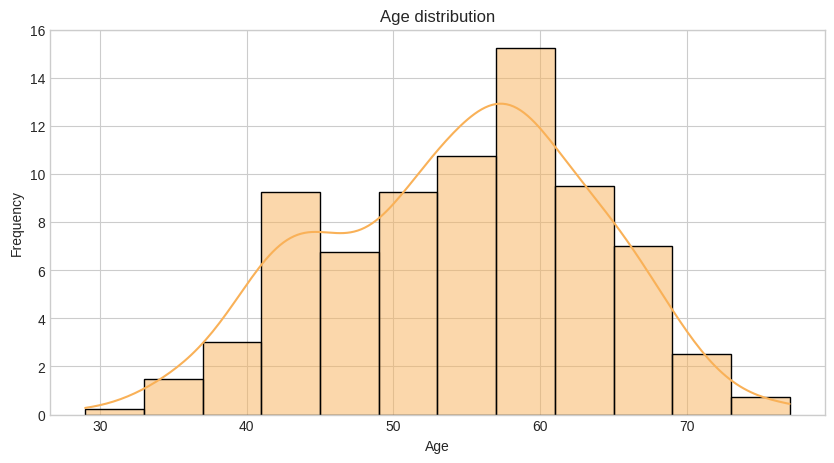

In [244]:
fig, ax = plt.subplots(figsize = (10,5))

#plot:
sns.histplot(data = heart_df['age'], 
             stat = 'frequency', 
             kde = True,
             color = Colours[3],
             ax=ax);

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Age distribution')
plt.xlabel('Age');

If we observe the age distribution of the patients: the *Kernel Density Etimate* is slightly swaying to the right, which also reflects in the scatter plot above as there are more *older* patients. On the other hand, the highest correlation on the `tagret` variable is seen with the *chest pain* variable `cp`:

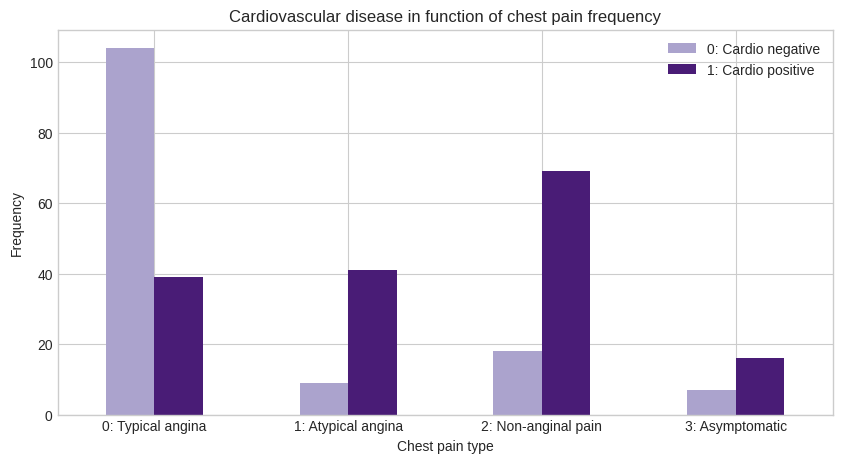

In [245]:
fig, ax = plt.subplots(figsize = (10,5))

#plot:
pd.crosstab(heart_df['cp'], 
            heart_df['target'] 
           ).rename(index = { 0: '0: Typical angina', 1: '1: Atypical angina', 2: '2: Non-anginal pain', 3: '3: Asymptomatic'} #From data_desc
                    ).plot.bar(color = (Colours[1], Colours[0]), ax = ax)

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Cardiovascular disease in function of chest pain frequency')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.legend(['0: Cardio negative', '1: Cardio positive'])
plt.xticks(rotation = 0);

After a little bit of research, the [American heart association](https://www.heart.org/en) supplies us with the following insights:
   * **Typical angina**: chest pain or discomfort caused when the heart muscle doesn't get enough oxygen-rich blood. 
   * **Atypical angina**: chest pain that is not Typical Angina
   * **Non-anginal pain**: typically esophageal spasms (not related to the heart)
   * **Asymptomatic**: chest pain not showing signs of any disease

Here, the fact that the *Atypical angina* it's not related to the heart but still seems to have a higher ratio of participants with cardiovascular disease than without. This is due to the actual definition of 'Atypical Angina' in the medical field, which seems to be confusing. [Source: PubMed](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/)

# 2) Data modelling:

Here we will try to build a model and train in order to predict our `target` variable:

## Set up:

We use Scikit Learn to prepare our data for training and modelling:

In [246]:
X = heart_df.drop('target', axis = 1)
y = heart_df['target']

We split our data into train and test sets:

In [247]:
np.random.seed(1729)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Our model is about **classification**, where we are predicting a **categorical variable** : `target`. It has **labeled data** of less than 100.000 samples. Using Scikit Learn's [documentation](https://scikit-learn.org/stable/user_guide.html) we opt for the following models:

* Log Reg : [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* K-Nearest Neighbors : [KNeighborsClassifier](https://scikit-learn.org/stable/modules/neighbors.html)
* Random Forest : [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* SVC : [Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* XGBoost : [XGBoost](https://xgboost.ai/).

In order to see which model performs the best, we proceed as follow:

#### 1. Instantiate each model in a dictionary:

In [248]:
models = {'logReg': LogisticRegression(max_iter = 1000),
          'KNN': KNeighborsClassifier(),
          'SVC': SVC(),
          'RandomForestClassifier': RandomForestClassifier(),
          'XGB': XGBClassifier(use_label_encoder=False)}

#### 2. Create function to fit and score models:

In [249]:
def mod_score(models, X_train, X_test, y_train, y_test):
    '''
    Takes a dictionarry of models and fits each on a training set and returns its score on a test set
    '''
    # Fix randomness
    np.random.seed(1729)
    # empty dict to append
    results = {}
    
    for name, model in models.items() :
        model.fit(X_train, y_train)
        results[name] = model.score(X_test, y_test)

    return results

#### 3. View the results:

In [250]:
mod_scores = mod_score(models, X_train, X_test, y_train, y_test)

[01:48:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


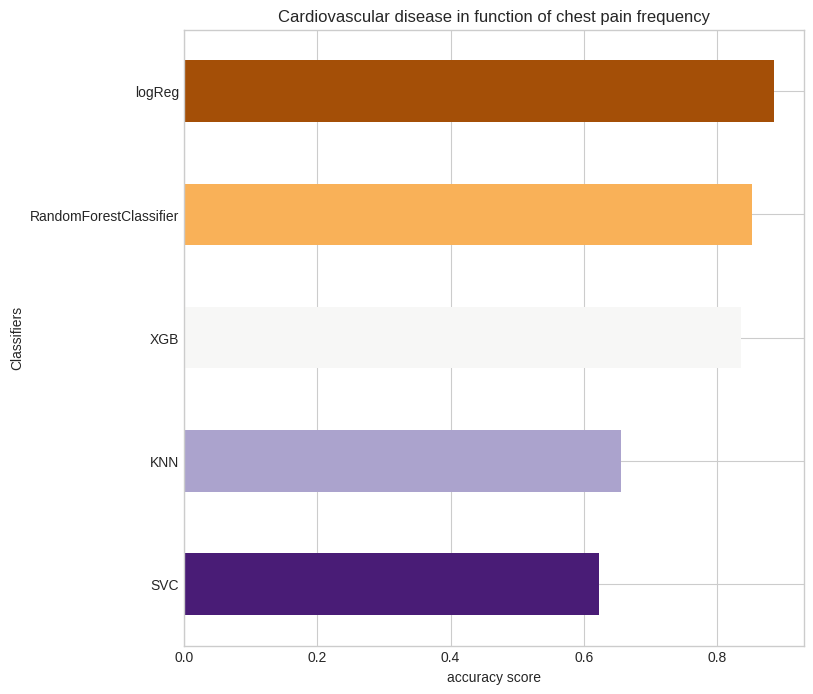

In [251]:
fig, ax = plt.subplots(figsize = (8,8))

# plot 
pd.DataFrame(mod_scores.values(), 
             mod_scores.keys(), 
             columns=['accuracy']
            ).reset_index().sort_values(by = 'accuracy').plot(x = 'index',
                                 y = 'accuracy', 
                                 ax = ax,
                                 kind = 'barh',
                                 color = Colours,
                                 legend = False)

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Cardiovascular disease in function of chest pain frequency')
plt.ylabel('Classifiers')
plt.xlabel('accuracy score')

plt.xticks(rotation = 0);

## Model fine tunning:

We will try and normalize our datasets at first to see if it improves our scores and then fine tune the hyperparameters of our classifiers to get the best possible results:

### 1.Datasets normalization:

We will choose two types of normalizations: MinMax normalization and scalling:

In [252]:
# Normalized datasets
minmax = MinMaxScaler()
Xm_train = minmax.fit_transform(X_train)
Xm_test = minmax.fit_transform(X_test)

normal = Normalizer()
Xn_train = normal.fit_transform(X_train)
Xn_test = normal.fit_transform(X_test)

# Scaled datasets
scaler = RobustScaler()
Xsc_train = scaler.fit_transform(X_train)
Xsc_test = scaler.fit_transform(X_test)

## Hyperparameters tuning:

For lack of data samples (only 4202) we cannot use a validation set to tune our models, we use *k-cross-validation* instead. 

### We can use `RandomizedSearchCV` or `GridSearchCV`:

Here, at least with the modelling that we have been doing, they both somehow come up with the same suggested tuning.

In [253]:
# logReg hyperparameters
logReg_grid = { 'C': np.logspace(-4, 4, 50),
           'solver': ['liblinear'],
         'penalty' : ['l1', 'l2']}

# RandomForest hyperparameters
RandFor_grid = {'n_estimators': np.arange(10, 1000, 50),
                   'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2) }

# KNN hyperparameters
KNN_grid = { 'leaf_size' : [i for i in range(1,30)],
           'n_neighbors' : [i for i in range(1,21)],
                   'p' : [1,2]
           }

# SVC hyperparameters
SVC_grid = [{'C': [1, 10, 100, 1000], 
             'kernel': ['linear']}, 
            {'C': [0.1, 1, 10, 100], 
            'gamma': [1, 0.1, 0.01, 0.001], 
            'kernel': ['rbf']}] 

#### 1- KNN:

In [254]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for KNN with non-norm data:
KNN_cstm = RandomizedSearchCV(KNeighborsClassifier(),
                              param_distributions = KNN_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(X_train, y_train)

# hyperparameter search for KNN with norm data:
KNN_cstm_m = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions = KNN_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xm_train, y_train)

# hyperparameter search for KNN with norm data:
KNN_cstm_n = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions = KNN_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xn_train, y_train)

# hyperparameter search for KNN with scaled data:
KNN_cstm_sc = RandomizedSearchCV(KNeighborsClassifier(),
                                param_distributions = KNN_grid,
                                cv=5,
                                 n_iter=20,
                                verbose=True
                                ).fit(Xsc_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [255]:
KNN_cstm.best_params_, KNN_cstm_m.best_params_, KNN_cstm_n.best_params_, KNN_cstm_sc.best_params_

({'p': 1, 'n_neighbors': 19, 'leaf_size': 15},
 {'p': 1, 'n_neighbors': 7, 'leaf_size': 5},
 {'p': 1, 'n_neighbors': 3, 'leaf_size': 25},
 {'p': 1, 'n_neighbors': 10, 'leaf_size': 3})

#### 2- RandomForest:

In [256]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for RandForest with non-norm data:
RandForest_cstm = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions = RandFor_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(X_train, y_train)

# hyperparameter search for KNN with norm data:
RandForest_cstm_m = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = RandFor_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xm_train, y_train)

# hyperparameter search for RandForest with min-norm data:
RandForest_cstm_n = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions = RandFor_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(Xn_train, y_train)

# hyperparameter search for RandForest with scaled data:
RandForest_cstm_sc = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions = RandFor_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(Xsc_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [257]:
RandForest_cstm.best_params_, RandForest_cstm_m.best_params_, RandForest_cstm_n.best_params_, RandForest_cstm_sc.best_params_

({'n_estimators': 860,
  'min_samples_split': 8,
  'min_samples_leaf': 1,
  'max_depth': 5},
 {'n_estimators': 160,
  'min_samples_split': 4,
  'min_samples_leaf': 1,
  'max_depth': 10},
 {'n_estimators': 360,
  'min_samples_split': 16,
  'min_samples_leaf': 15,
  'max_depth': 3},
 {'n_estimators': 310,
  'min_samples_split': 6,
  'min_samples_leaf': 1,
  'max_depth': 5})

#### 3) logReg: 

In [258]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for RandForest with non-norm data:
logReg_cstm = RandomizedSearchCV(LogisticRegression(max_iter = 800),
                              param_distributions = logReg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(X_train, y_train)

# hyperparameter search for KNN with min-norm data:
logReg_cstm_m = RandomizedSearchCV(LogisticRegression(max_iter = 800),
                                param_distributions = logReg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                                ).fit(Xm_train, y_train)

# hyperparameter search for RandForest with norm data:
logReg_cstm_n = RandomizedSearchCV(LogisticRegression(max_iter = 800),
                              param_distributions = logReg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(Xn_train, y_train)

# hyperparameter search for RandForest with with scaled data:
logReg_cstm_sc = RandomizedSearchCV(LogisticRegression(max_iter = 800),
                              param_distributions = logReg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True
                              ).fit(Xsc_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [259]:
logReg_cstm.best_params_, logReg_cstm_m.best_params_, logReg_cstm_n.best_params_, logReg_cstm_sc.best_params_

({'solver': 'liblinear', 'penalty': 'l2', 'C': 0.3906939937054613},
 {'solver': 'liblinear', 'penalty': 'l2', 'C': 35.564803062231285},
 {'solver': 'liblinear', 'penalty': 'l1', 'C': 339.3221771895323},
 {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.2067926406393288})

#### 4) SVC: 

In [260]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for SVC with non-norm data:
SVC_cstm = RandomizedSearchCV(SVC(),
                              param_distributions = SVC_grid,
                              cv=5,
                              verbose=True,
                              refit = True
                              ).fit(X_train, y_train)

# hyperparameter search for SVC with min-norm data:
SVC_cstm_m = RandomizedSearchCV(SVC(),
                                param_distributions = SVC_grid,
                                cv=5,
                                verbose=True,
                                refit = True
                                ).fit(Xm_train, y_train)

# hyperparameter search for SVC with norm data:
SVC_cstm_n = RandomizedSearchCV(SVC(),
                                param_distributions = SVC_grid,
                                cv=5,
                                verbose=True,
                                 refit = True
                                ).fit(Xn_train, y_train)

# hyperparameter search for SVC with scaled data:
SVC_cstm_sc = RandomizedSearchCV(SVC(),
                                param_distributions = SVC_grid,
                                cv=5,
                                verbose=True,
                                 refit = True
                                ).fit(Xsc_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [261]:
SVC_cstm.best_params_, SVC_cstm_m.best_params_, SVC_cstm_n.best_params_, SVC_cstm_sc.best_params_

({'kernel': 'linear', 'C': 1},
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10},
 {'kernel': 'linear', 'C': 100},
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10})

#### 5) XGBoost:

In [262]:
# Setup random seed
np.random.seed(1729)

# hyperparameter search for XGBoost with non-norm data:
XGB_cstm = RandomizedSearchCV(XGBClassifier(use_label_encoder=False),
                              param_distributions = {},
                              cv=5,
                              verbose=True,
                              n_iter=1,
                              ).fit(X_train, y_train)

# hyperparameter search for SVC with min-norm data:
XGB_cstm_m = RandomizedSearchCV(XGBClassifier(use_label_encoder=False),
                                param_distributions = {},
                                cv=5,
                                verbose=True,
                                n_iter=1,
                                ).fit(Xm_train, y_train)

# hyperparameter search for SVC with norm data:
XGB_cstm_n = RandomizedSearchCV(XGBClassifier(use_label_encoder=False),
                                param_distributions = {},
                                cv=5,
                                verbose=True,
                                n_iter=1,
                                ).fit(Xn_train, y_train)

# hyperparameter search for SVC with scaled data:
XGB_cstm_sc = RandomizedSearchCV(XGBClassifier(use_label_encoder=False),
                                param_distributions = {},
                                cv=5,
                                verbose=True,
                                n_iter=1,
                                ).fit(Xsc_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[01:52:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:52:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:52:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:52:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Exp

Finally, we make a comparison of the progress 

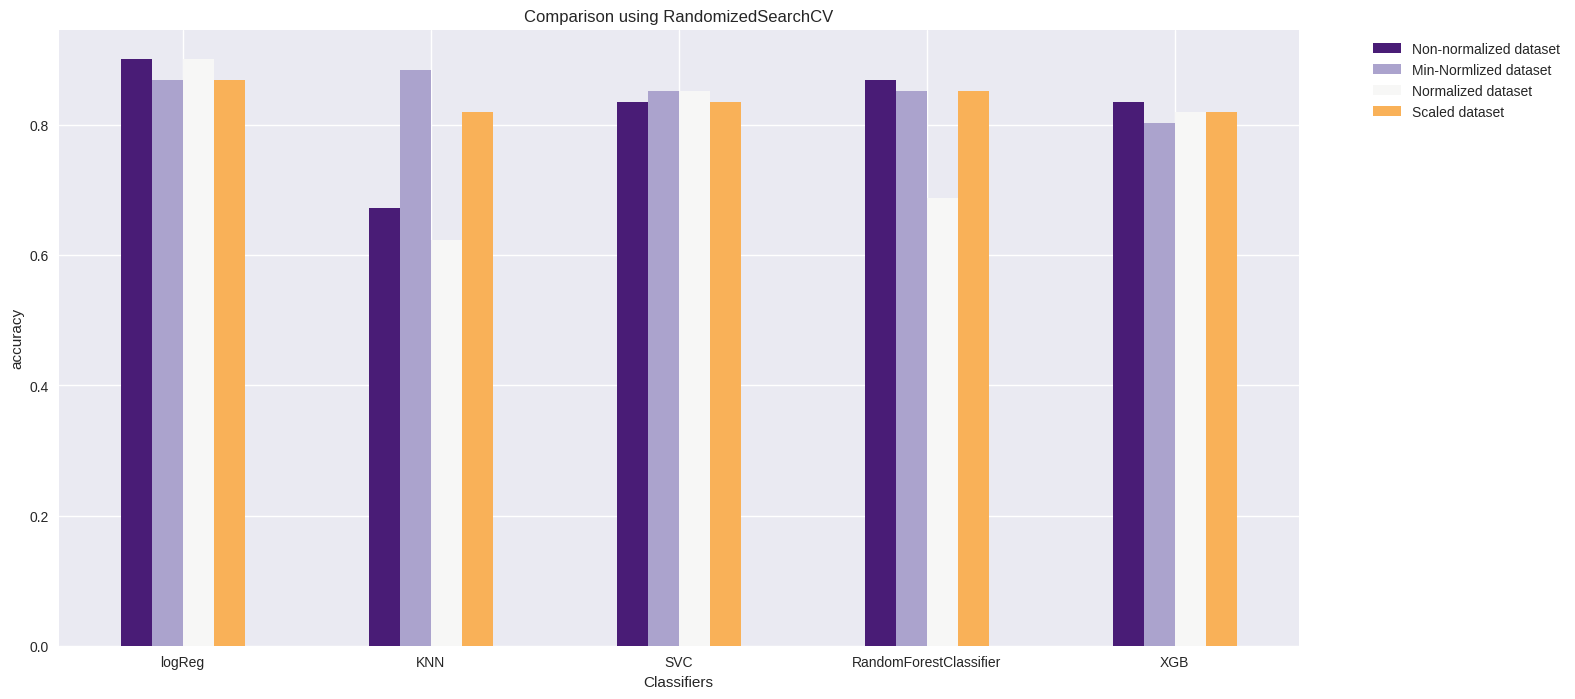

In [266]:
score_comp = pd.DataFrame(index = models.keys())
score_comp['accuracy (non-norm)'] = [logReg_cstm.score(X_test, y_test), KNN_cstm.score(X_test, y_test), RandForest_cstm.score(X_test, y_test), SVC_cstm.score(X_test, y_test), XGB_cstm.score(X_test, y_test)]
score_comp['accuracy (min-norm)'] = [logReg_cstm_m.score(Xm_test, y_test), KNN_cstm_m.score(Xm_test, y_test), RandForest_cstm_m.score(Xm_test, y_test), SVC_cstm_m.score(Xm_test, y_test), XGB_cstm_m.score(Xm_test, y_test)]
score_comp['accuracy (norm)'] = [logReg_cstm_n.score(Xn_test, y_test), KNN_cstm_n.score(Xn_test, y_test), RandForest_cstm_n.score(Xn_test, y_test), SVC_cstm_n.score(Xn_test, y_test), XGB_cstm_n.score(Xn_test, y_test)]
score_comp['accuracy (scaled)'] = [logReg_cstm_sc.score(Xsc_test, y_test), KNN_cstm_sc.score(Xsc_test, y_test), RandForest_cstm_sc.score(Xsc_test, y_test), SVC_cstm_sc.score(Xsc_test, y_test), XGB_cstm_sc.score(Xsc_test, y_test)]


fig, ax = plt.subplots(figsize = (16,8))

#plot:
score_comp.plot.bar(color = Colours, ax = ax, legend=  False)

# plot infos:
plt.style.use('seaborn')
plt.title('Comparison using RandomizedSearchCV')
plt.xlabel('Classifiers')
plt.ylabel('accuracy')
plt.legend(['Non-normalized dataset', 'Min-Normlized dataset', 'Normalized dataset', 'Scaled dataset'], bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation = 0);

## 3) Model evaluation:

Now we want to evaluate our model using the logReg classifier that we have been tuning according to more metrics than just `accuracy`:

In [269]:
logReg_cstm.best_params_, logReg_cstm_n.best_params_

({'solver': 'liblinear', 'penalty': 'l2', 'C': 0.3906939937054613},
 {'solver': 'liblinear', 'penalty': 'l1', 'C': 339.3221771895323})

In [270]:
# Instantiate best model with best hyperparameters
clf = LogisticRegression(max_iter = 800,
                         C = 339.3221771895323,
                         solver = 'liblinear',
                         penalty = 'l1').fit(Xn_train, y_train);
#make predictions
y_preds = clf.predict(Xn_test)

### [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/):

It is somehow a visual way to show where our model made nailed its predictions and where it failed:

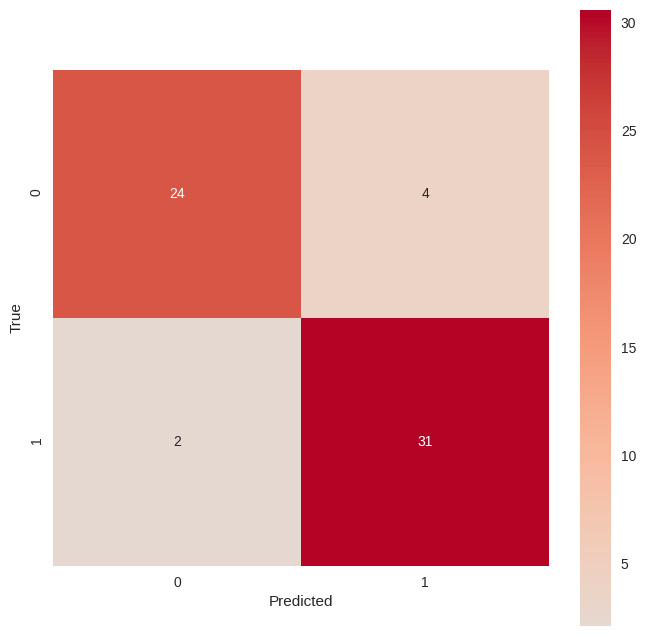

In [271]:
conf_mtrx = confusion_matrix(y_test, y_preds)

# Create a more visual confusion matrix
def conf_mtrx_plot(mtrx) :
    import seaborn as sns

    fig, ax = plt.subplots(figsize = (8,8))

    ax = sns.heatmap(data = conf_mtrx,
                     cmap = 'coolwarm',
                     #fmt = '.2f',
                     robust = True,
                     center = 0,
                     square = True,
                     annot = True)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

conf_mtrx_plot(conf_mtrx);

**Note:** One can use the method `plot_confusion_matrix` from `sklearn`, the output is something like:

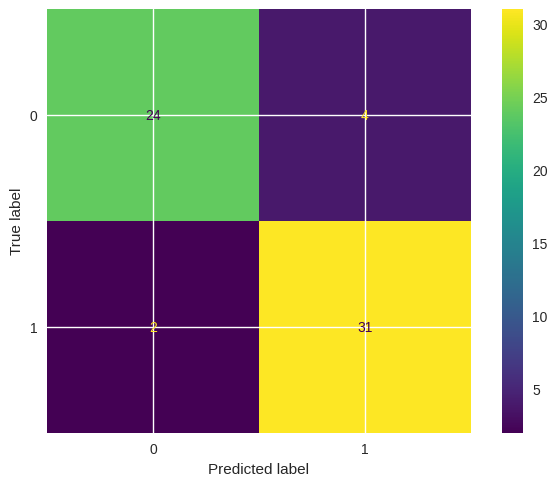

In [272]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logReg_cstm_n, Xn_test, y_test);

(but I personally prefer writting my own confusion matrix function)

### ROC Curve and AUC Scores

We basically compare the true positive rate to the false positive rate, i.e. a person that tests positive, but does not actually have the disease vs a person that tests negative although has a cardiovascular disease:

In [273]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(Xn_test)[:, 1])
print(fpr.shape, tpr.shape)

(12,) (12,)


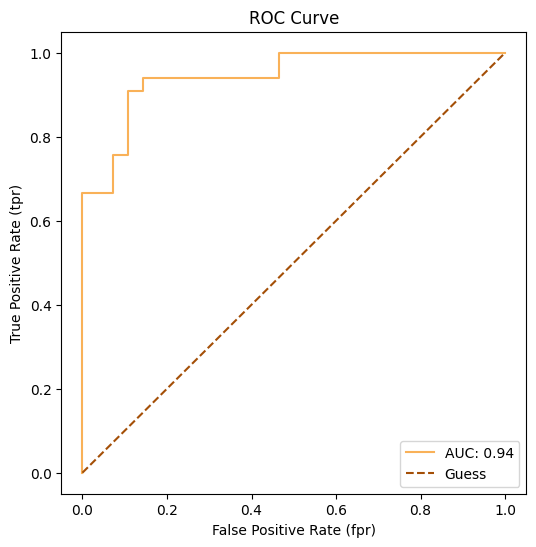

In [281]:
def ROC_cur_plot(clf, X_test, y_test):
    ''' Plot a ROC curve of the TPR and FPR'''
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    AUC = metrics.auc(fpr,tpr)
    # Plot ROC curve
    fig, ax = plt.subplots(figsize = (6,6))
    plt.plot(fpr, tpr, color=Colours[3], label='AUC: {:.2f}'.format(AUC))
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color=Colours[4], linestyle='--', label='Guess')
    # Customize the plot
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.style.use('default')
    

ROC_cur_plot(clf, Xn_test, y_test)

**Note:** Scikit-Learn provides a handy function for creating both of these called [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) which does the following:

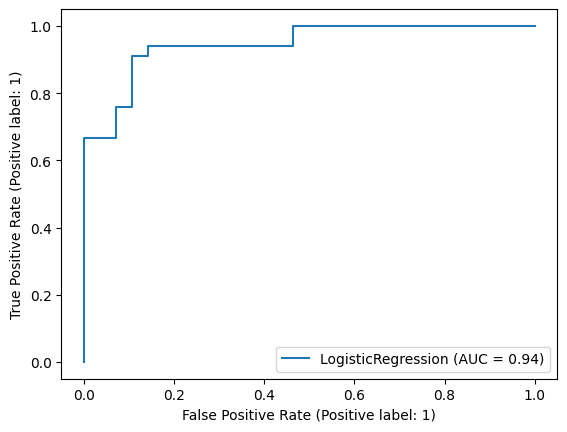

In [283]:
# Plot a ROC curve using our current machine learning model using plot_roc_curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, Xn_test, y_test);

### [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Now let's have a look on the main classification metrics:

In [284]:
# Create a classification report using the classification_report function
report = classification_report(y_test, y_preds, output_dict=True)

pd.DataFrame(report).T

,precision,recall,f1-score,support
0,0.923077,0.857143,0.888889,28.000000
1,0.885714,0.939394,0.911765,33.000000
accuracy,0.901639,0.901639,0.901639,0.901639
macro avg,0.904396,0.898268,0.900327,61.000000
weighted avg,0.902864,0.901639,0.901264,61.000000


We create another function in order to evaluate our model on all these metrics:

In [285]:
def eval_mod(model, X_test, y_test):
    ''' evaluate a model on y_test'''
    y_preds = model.predict(X_test)
    acc = model.score(X_test, y_test)
    prec = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    dft_eval = {'accuracy' : acc, 
               'precision' : prec, 
                  'recall' : recall, 
                'f1 score' : f1}
    for v, k in dft_eval.items():
        print(v,': {:.2f}%'.format(k * 100))
    return dft_eval

In [286]:
dft_eval = eval_mod(clf, Xn_test, y_test)

accuracy : 90.16%
precision : 88.57%
recall : 93.94%
f1 score : 91.18%


Finally, we use `cross_val_score()` to *Cross-validate* our metrics and have more accurate and solid results:

In [287]:
# cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf, X, y, scoring = "accuracy", cv = 5))

# cross-validated precision
cv_prec = np.mean(cross_val_score(clf, X, y, scoring = "precision", cv = 5))

# cross-validated recall
cv_recall = np.mean(cross_val_score(clf, X, y, scoring = "recall", cv = 5))

# cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf, X, y, scoring = "f1", cv = 5))

In [288]:
cv_eval = {'accuracy' : cv_acc, 
           'precision' : cv_prec, 
           'recall' : cv_recall, 
           'f1 score' : cv_f1 }

for v,k in cv_eval.items():
    print(v,': {:.2f}%'.format(k * 100))

accuracy : 82.83%
precision : 82.30%
recall : 87.88%
f1 score : 84.86%


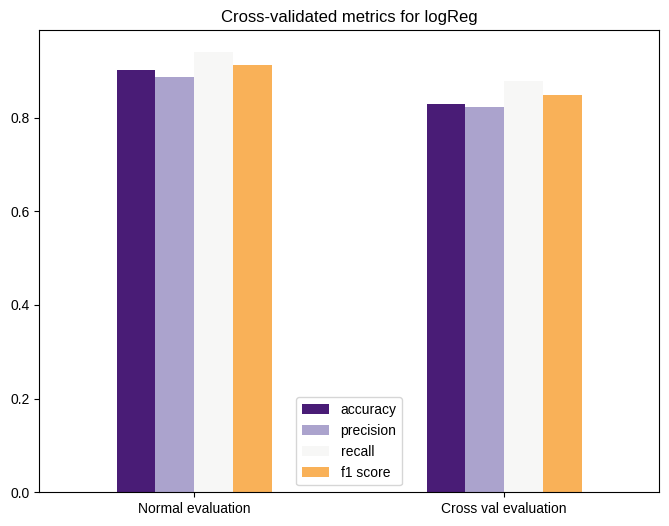

In [289]:
fig, ax = plt.subplots(figsize = (8,6))

pd.DataFrame([dft_eval, cv_eval], index = ['Normal evaluation', 'Cross val evaluation']).plot(kind = 'bar',
                                      ax = ax, color = Colours);

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Cross-validated metrics for logReg')
plt.xticks(rotation = 0);

## 4) Feature importance:

Finally, we will find which features were important in order to predict cardiovascular diseases using the medical examination results we had, or similarily: 

**Which charateristics contribute the most to logReg predicting whether someone has cadiovascular disease or not?**


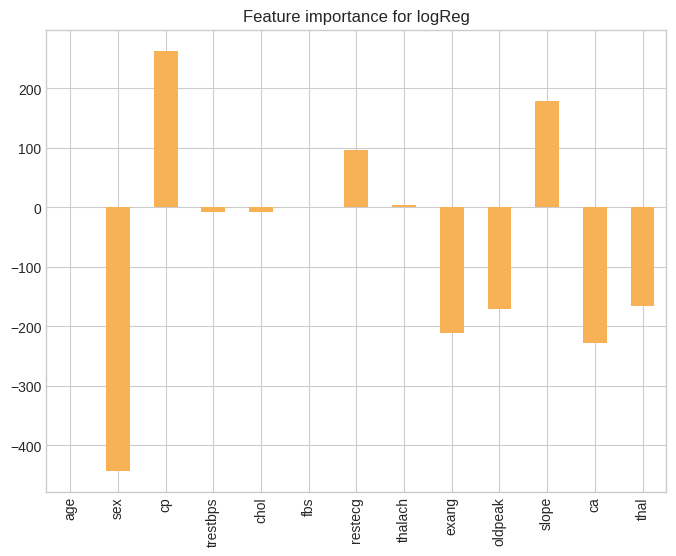

In [290]:
#get the coefficients from logReg
clf.coef_

# Match features to columns of our df
features_dict = dict(zip(heart_df.columns, list(clf.coef_[0])))

#set figure
fig, ax = plt.subplots(figsize = (8,6))

pd.DataFrame(features_dict.values(), index = features_dict.keys()).plot(kind = 'bar',
                                      ax = ax, color = Colours[3], legend = False);

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Feature importance for logReg');

Now, the final remark to make is that our model is learning and figuring out the pattern : `slope` increases  $\Rightarrow$  `target` $\longrightarrow$ positive.

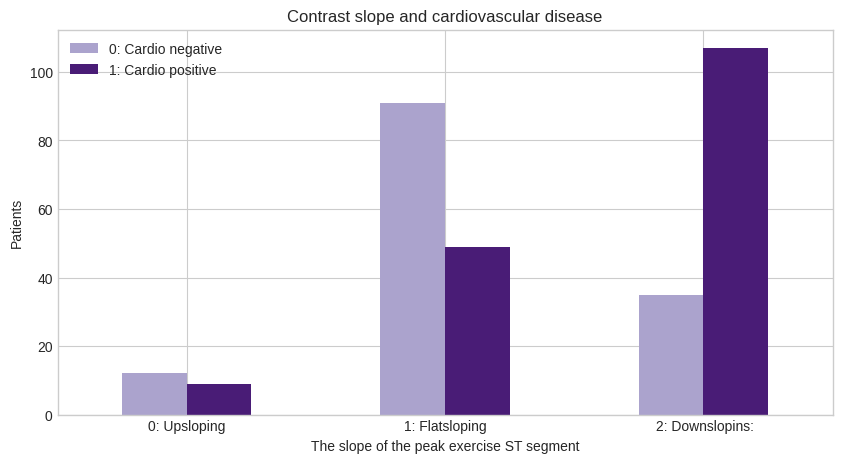

In [291]:
fig, ax = plt.subplots(figsize = (10,5))

# Contrast slope (positive coefficient) with target
pd.crosstab(heart_df["slope"], heart_df["target"]).rename(index = { 0: '0: Upsloping', 1: '1: Flatsloping', 2: ' 2: Downslopins:'} #From data_desc
                    ).plot.bar(color = (Colours[1], Colours[0]), ax = ax)

# plot infos:
plt.style.use('seaborn-whitegrid')
plt.title('Contrast slope and cardiovascular disease')
plt.xlabel('The slope of the peak exercise ST segment')
plt.ylabel('Patients')
plt.legend(['0: Cardio negative', '1: Cardio positive'])
plt.xticks(rotation = 0);

Here, the data does suggest such a thing, although it seems kind of logical as well:
* Upsloping: better heart rate with excercise (uncommon)
* Flatsloping: minimal change (typical healthy heart)
* Downslopins: signs of unhealthy heart

## 5) Conclusion

We analysed our sample and trained a model that reached up to 90.16% on score accuracy and 83.81% on cross-validated accuracy. As our model here is pretty much balanced we would want aim for a higher **accuracy**, of at least > 95%. However, since false negative prediction are lower than the false positive ones (confusion matrix) we do have a pretty high **recall** (91.52% on cross-validation) which is good.

We might maybe want to try [CatBoost](https://catboost.ai/) or maybe more fine tunning...